In [1]:
import os
from datetime import datetime, timedelta
from enum import Enum
import mlflow
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from test_case_utils import WeatherParams, TestCase, TargetCases, MlflowConfig
from geo_plot_utils import create_geo_plot, save_geo_plots, interpolate, TargetManilaErea

/home/akira/anaconda3/envs/poteka-pipeline-pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
test_case_names = TargetCases.good_case_names + TargetCases.bad_case_names
run_ids = {
    'rainTempHumid': '7e8bb6ce24704ed3bf1b79912d9d8438',
    'rainonly': '5e8971a99ff84824bcc199d160cf5389'
}

In [3]:
for test_case_name in test_case_names:
    for model_prefix, run_id in run_ids.items():
        save_geo_plots(TestCase(test_case_name, run_id=run_id), model_prefix=model_prefix)

In [4]:
root_dir_path = 'geo_plots'
# 2019/10/12 case
test_case_name = TargetCases.good_case_names[1]
data_paths = TestCase(test_case_name, run_id=run_ids['rainTempHumid']).data_pathes

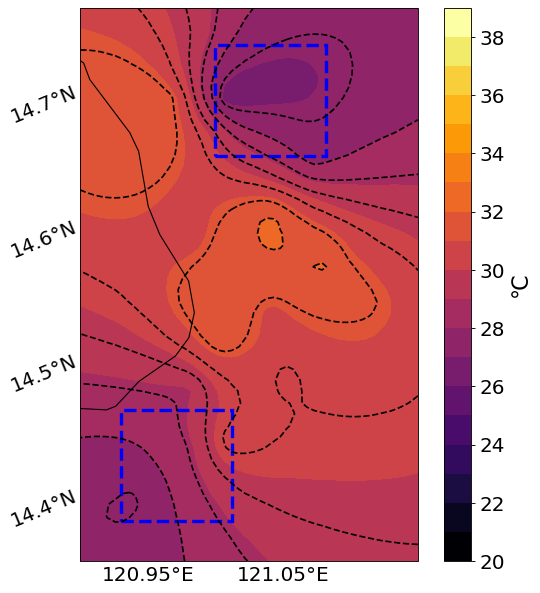

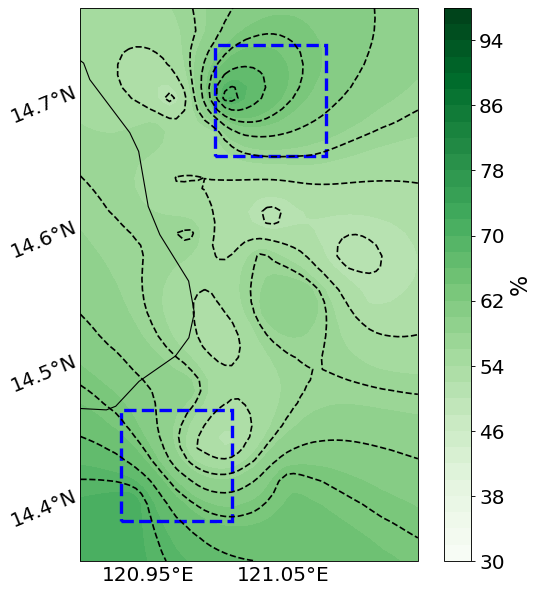

In [36]:
# 2019/10/12 case
# input humidity and temperature

# Get last input frame of temperature and humidity
one_day_data_path = data_paths['one_day_data']['input'][-1]
time_idx = 5
for param in [WeatherParams.temperature, WeatherParams.humidity]:
    save_dir_path = os.path.join(root_dir_path, test_case_name, 'input')
    save_file_path = os.path.join(save_dir_path, f'{param}-{time_idx}.png')
    data = interpolate(
        pd.read_csv(one_day_data_path).rename(columns={'Unnamed: 0': 'Station_Name'}),
        param_name=param
    )
    fig = plt.figure(figsize=(7, 8), dpi=80)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    create_geo_plot(ax, param, data)
    # Add Rectangle
    ax.add_patch(
        patches.Rectangle(
            xy=(120.93, 14.38),
            width=0.082,
            height=0.082,
            linewidth=3,
            edgecolor='b',
            facecolor='none',
            linestyle='--',
            transform=ccrs.PlateCarree()
        )
    )
    ax.add_patch(
        patches.Rectangle(
            xy=(121.0, 14.65),
            width=0.082,
            height=0.082,
            linewidth=3,
            edgecolor='b',
            facecolor='none',
            linestyle='--',
            transform=ccrs.PlateCarree()
        )
    )
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(save_file_path)
    plt.show()
    plt.close()

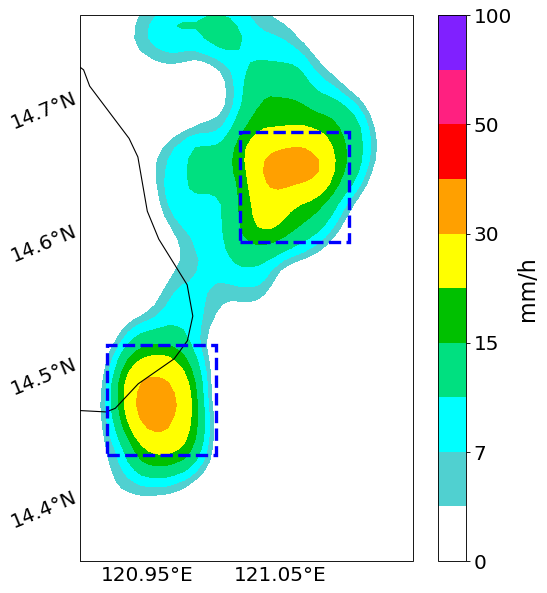

In [37]:
# 2019/10/12 case
# prediction
data_path = data_paths[WeatherParams.rainfall]['predict'][-1]
time_idx = 5
param = WeatherParams.rainfall
save_dir_path = os.path.join(root_dir_path, test_case_name, 'predict', 'rainTempHumid')
save_file_path = os.path.join(save_dir_path, f'{param}-{time_idx}.png')
data = pd.read_parquet(data_path).to_numpy()
fig = plt.figure(figsize=(7, 8), dpi=80)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
create_geo_plot(ax, param, data)
# Add Rectangle
ax.add_patch(
    patches.Rectangle(
        xy=(120.92, 14.43),
        width=0.082,
        height=0.082,
        linewidth=3,
        edgecolor='b',
        facecolor='none',
        linestyle='--',
        transform=ccrs.PlateCarree()
    )
)
ax.add_patch(
    patches.Rectangle(
        xy=(121.02, 14.59),
        width=0.082,
        height=0.082,
        linewidth=3,
        edgecolor='b',
        facecolor='none',
        linestyle='--',
        transform=ccrs.PlateCarree()
    )
)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(save_file_path)
plt.show()
plt.close()

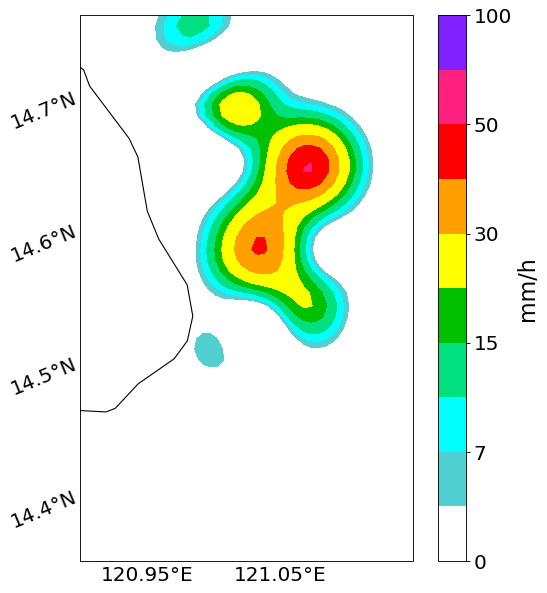

In [5]:
# 2019/10/12 case
# label
data_path = data_paths[WeatherParams.rainfall]['label'][-1]
time_idx = 5
param = WeatherParams.rainfall
save_dir_path = os.path.join(root_dir_path, test_case_name, 'label')
save_file_path = os.path.join(save_dir_path, f'{param}-{time_idx}.png')
data = pd.read_csv(data_path, index_col=0).to_numpy()
fig = plt.figure(figsize=(7, 8), dpi=80)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
create_geo_plot(ax, param, data)
# Add Rectangle
# ax.add_patch(
#     patches.Rectangle(
#         xy=(120.92, 14.43),
#         width=0.082,
#         height=0.082,
#         linewidth=3,
#         edgecolor='b',
#         facecolor='none',
#         linestyle='--',
#         transform=ccrs.PlateCarree()
#     )
# )
# ax.add_patch(
#     patches.Rectangle(
#         xy=(121.02, 14.59),
#         width=0.082,
#         height=0.082,
#         linewidth=3,
#         edgecolor='b',
#         facecolor='none',
#         linestyle='--',
#         transform=ccrs.PlateCarree()
#     )
# )
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(save_file_path)
plt.show()
plt.close()

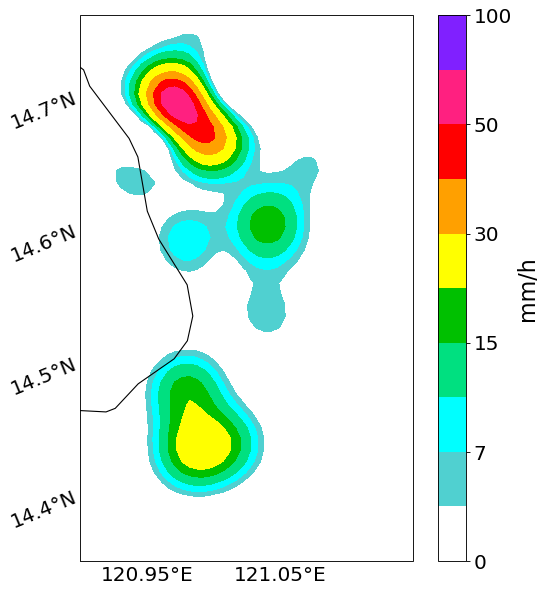

In [6]:
# 2019/10/12 case
# label but 10-30
one_day_data_path = data_paths['one_day_data']['label'][-1].replace('9-30.csv', '10-30.csv')
time_idx = 5
param = WeatherParams.rainfall
save_dir_path = os.path.join(root_dir_path, test_case_name, 'label')
save_file_path = os.path.join(save_dir_path, f'{param}-10-30.png')
data = pd.read_csv(one_day_data_path.replace('one_day_data', 'rain_image'), index_col=0).to_numpy()
fig = plt.figure(figsize=(7, 8), dpi=80)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
create_geo_plot(ax, param, data)
# Add Rectangle
# ax.add_patch(
#     patches.Rectangle(
#         xy=(120.92, 14.43),
#         width=0.082,
#         height=0.082,
#         linewidth=3,
#         edgecolor='b',
#         facecolor='none',
#         linestyle='--',
#         transform=ccrs.PlateCarree()
#     )
# )
# ax.add_patch(
#     patches.Rectangle(
#         xy=(121.02, 14.59),
#         width=0.082,
#         height=0.082,
#         linewidth=3,
#         edgecolor='b',
#         facecolor='none',
#         linestyle='--',
#         transform=ccrs.PlateCarree()
#     )
# )
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(save_file_path)
plt.show()
plt.close()

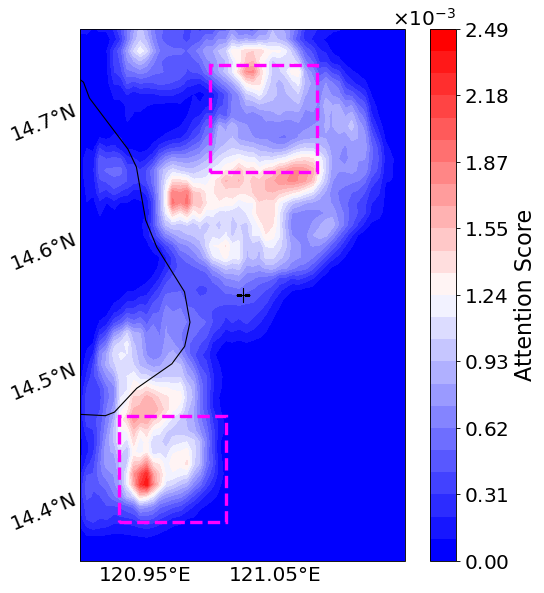

In [40]:
# 2019/10/12
# Attention maps
# 2019/10/12 case
# label but 10-30
data_path = data_paths['attention_maps']['layer4'][-1]
time_idx = 5
param = WeatherParams.attention_map
save_dir_path = os.path.join(root_dir_path, test_case_name, 'attention_map', 'rainTempHumid')
save_file_path = os.path.join(save_dir_path, f'layer4-5.png')
data = np.load(data_path)
fig = plt.figure(figsize=(7, 8), dpi=80)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
create_geo_plot(ax, param, data)
# Add Rectangle
ax.add_patch(
    patches.Rectangle(
        xy=(120.93, 14.38),
        width=0.082,
        height=0.082,
        linewidth=3,
        edgecolor='magenta',
        facecolor='none',
        linestyle='--',
        transform=ccrs.PlateCarree()
    )
)
ax.add_patch(
    patches.Rectangle(
        xy=(121.0, 14.65),
        width=0.082,
        height=0.082,
        linewidth=3,
        edgecolor='magenta',
        facecolor='none',
        linestyle='--',
        transform=ccrs.PlateCarree()
    )
)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(save_file_path)
plt.show()
plt.close()

In [41]:
save_dir_path

'geo_plots/NOT_TC_case_2019-10-12_8-40_start/attention_map/rainTempHumid'